In [1]:
import torch
from torch import nn
import sys
sys.path.append("..")
from general.model_utils import *
from general.data import *

In [2]:
from general.utils import *

In [3]:
from C2D_Models import *

In [4]:
test_data = UCSD(dataset_type=2, isTrain=False)
# test_data = Avenue(isTrain=False)

12it [00:01,  6.77it/s]


In [5]:
attention_version = ConvAttentionWapper(C2D_AE_128_3x3(channels = 1))
load_model(attention_version, "../../VAD_MODEL_TREE/UCSD2/C2D/C2D_3x3_128_CONV_ATTENTION_MSE_UCSD2/C2D_3x3_128_CONV_ATTENTION_MSE_UCSD2.pth.tar")

In [6]:
normal_version = C2D_AE_128_3x3(channels = 1)
load_model(normal_version, "../../VAD_MODEL_TREE/UCSD2/C2D/C2D_3x3_128_MSE_UCSD2/C2D_3x3_128_MSE_UCSD2.pth.tar")

In [5]:
test_img1 = test_data[2][0][-4]

In [6]:
class ActivationVisualizer:
    def __init__(self,):
        pass
    
    def get_layer_outputs(self, layer, inputs):
        while len(inputs.shape) < 4: 
            inputs = inputs.unsqueeze(dim = 0)
        outputs = list(layer(inputs))
        return outputs[0]
    
    def normalize_tensor(self, x):
        return (x - x.min()) / (x.max() - x.min())
    
    def to_255(self, x):
        if x.max() > 1:
            print(x.max())
            return x
        return (x * 255).type(torch.uint8)
    
    def display(self, x):
        x = x.squeeze()
        x = self.normalize_tensor(x)
        img_array = tensor_to_numpy(x)
        img_array = image_255(img_array)
        img = Image.fromarray(img_array)
        img.show()
        return img
        
    def save_activations(self, input_tensor, file_path, padding = 0):
        if ".png" not in file_path: file_path += ".png"
        input_tensor = input_tensor.squeeze()
        assert len(input_tensor.shape) < 4, "Too many dimensions in the input"
        n = input_tensor.shape[0]
        if len(input_tensor.shape) == 3: input_tensor = input_tensor.unsqueeze(dim = 1)
        grid = make_grid(input_tensor, nrow=int(np.round(np.sqrt(n))), padding = padding)
        save_image(grid, file_path,)

In [7]:
act_viz = ActivationVisualizer()

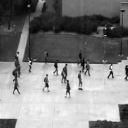

In [8]:
act_viz.display(test_img1)

In [9]:
model = AAC_AE(channels=1)
load_model(model, "../../VAD_models/C2D_AE_models/128/experiments/AAC_AE_MSE_UCSD2/AAC_AE_MSE_UCSD2.pth.tar")

In [15]:
act_outs = act_viz.get_layer_outputs(nn.Sequential(model.encoder[6], model.encoder[7], model.encoder[8]), act_outs)
act_viz.save_activations(act_outs, "dummy/attention_el3.png")

In [12]:
act_outs = act_viz.get_layer_outputs(attention_version.model.encoder[0], test_img1)
act_viz.save_activations(act_outs, "dummy/attention_el1.png")

In [13]:
normal_outs = act_viz.get_layer_outputs(normal_version.encoder[0], test_img1)
act_viz.save_activations(normal_outs, "dummy/normal_el1.png")

In [15]:
act_outs = act_viz.get_layer_outputs(attention_version.model.encoder[1], act_outs)
act_viz.save_activations(act_outs, "dummy/attention_el2.png")

In [16]:
normal_outs = act_viz.get_layer_outputs(normal_version.encoder[1], normal_outs)
act_viz.save_activations(normal_outs, "dummy/normal_el2.png")

In [17]:
act_outs = act_viz.get_layer_outputs(attention_version.model.encoder[2], act_outs)
act_viz.save_activations(act_outs, "dummy/attention_el3.png")

In [18]:
normal_outs = act_viz.get_layer_outputs(normal_version.encoder[2], normal_outs)
act_viz.save_activations(normal_outs, "dummy/normal_el3.png")

In [ ]:
torch.optim.Adam(nn.Conv2d(3,3,1).param)

In [19]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau()

TypeError: __init__() missing 1 required positional argument: 'optimizer'

In [24]:
scheduler.step(0.120)